In [19]:
import cv2
import skimage
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import rescale, resize, downscale_local_mean

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
from skimage import data
from skimage.util import img_as_ubyte
from skimage import io
import numpy as np

## Thresholding

(-0.5, 2178.5, 1299.5, -0.5)

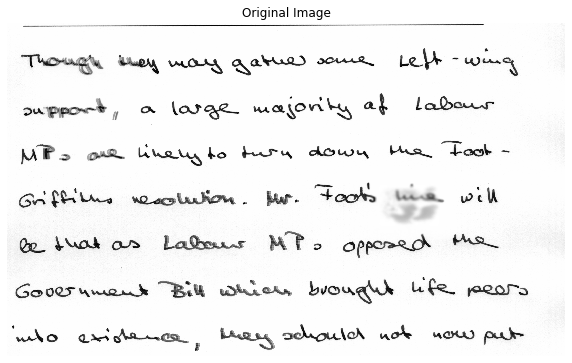

In [49]:
img = mpimg.imread('/home/varshini/Capstone/Damaged/a01-003u.png')
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

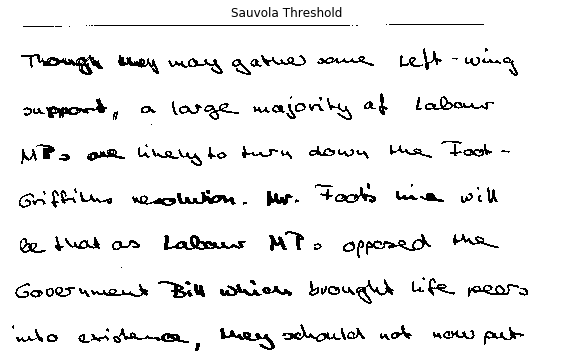

In [50]:
img = mpimg.imread('/home/varshini/Capstone/Damaged/a01-003u.png')
orig = img
#img = img[600:2800,0:]

window_size = 125

thresh_sauvola = threshold_sauvola(img, window_size=window_size)

binary_sauvola = img > thresh_sauvola

img = binary_sauvola
img1 = img_as_ubyte(img)
thresh_color = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
#img = rescale(img, 3.25, anti_aliasing=False)

#plt.subplot(2, 2, 4)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

# Erosion and Dilation

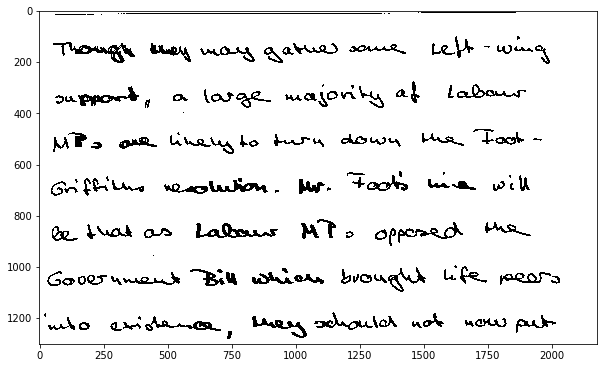

In [51]:
orig_phantom = img
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(orig_phantom, cmap=plt.cm.gray)


In [52]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,30), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [53]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

## Dilation

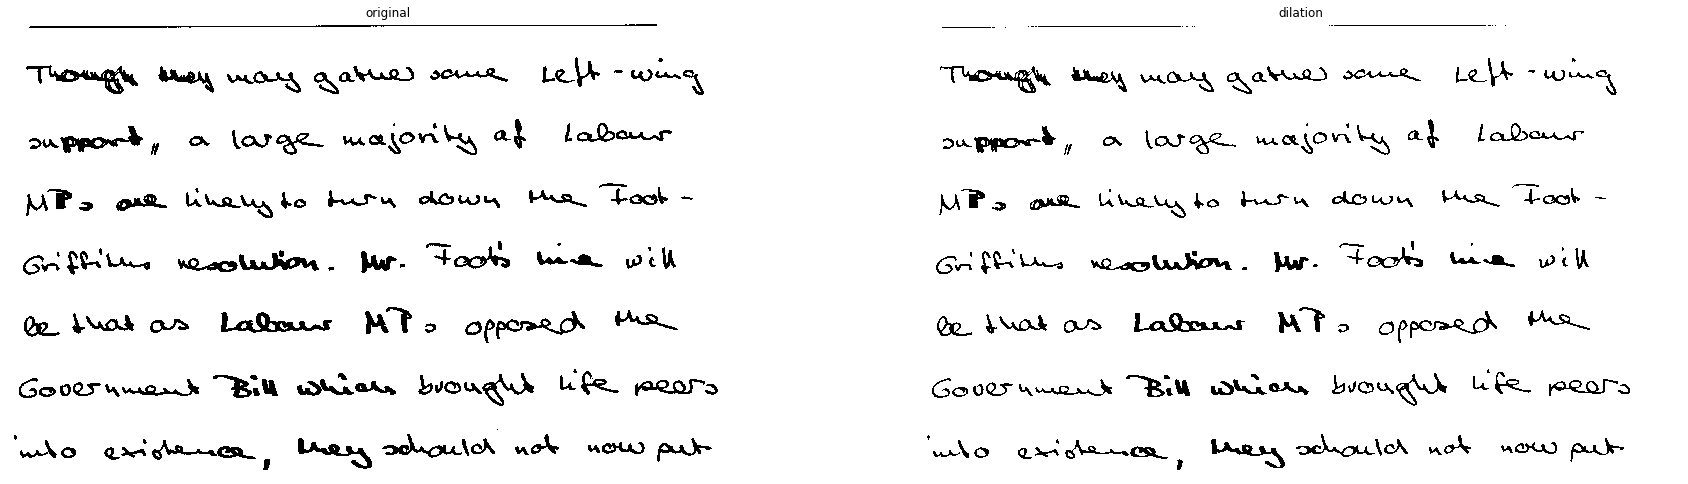

In [54]:
selem = disk(1)
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

## Erosion

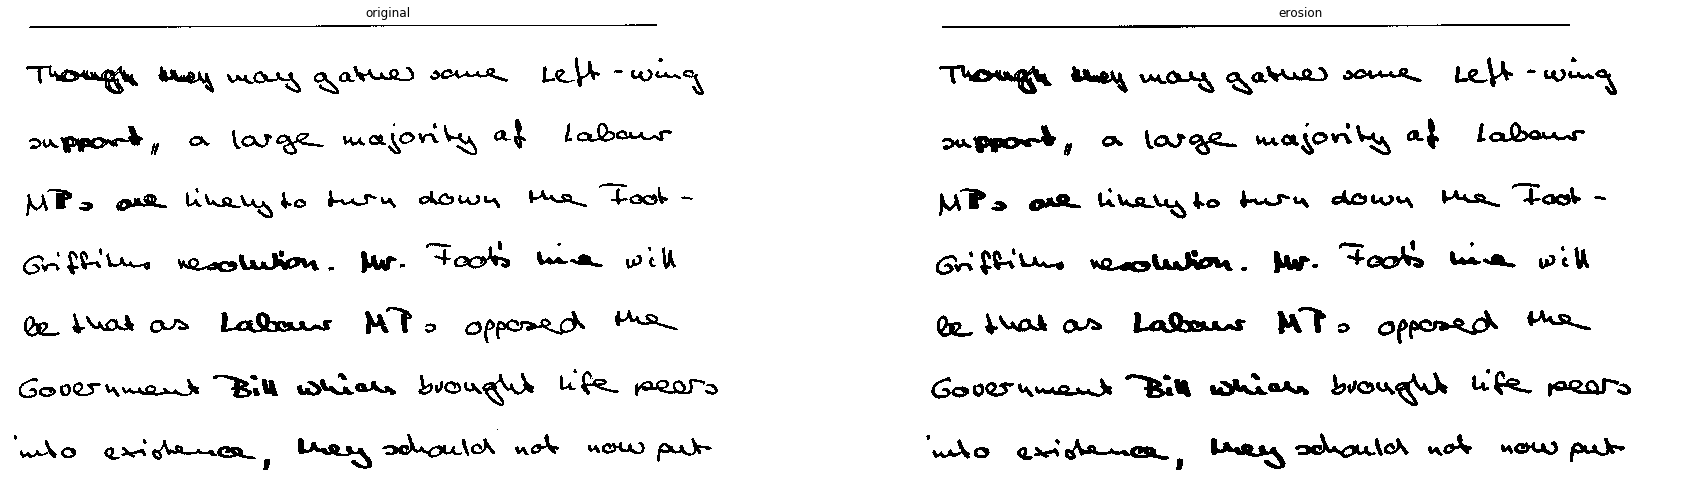

In [55]:
selem = disk(2)
eroded = erosion(dilated, selem)
plot_comparison(orig_phantom, eroded, 'erosion')